# ***CONCRETE COMPRESSIVE STRENGTH - NO SUPERVISADO***

# **CCS - RandomForest**

In [1]:
# Detección de Anomalías No Supervisada con RandomForest
# Dataset: Concrete-Compressive-Strength-Prediction
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Cargar el dataset
!git clone https://github.com/esvs2202/Concrete-Compressive-Strength-Prediction.git

# Cargar CSV
data = pd.read_csv("Concrete-Compressive-Strength-Prediction/dataset/concrete_data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

Cloning into 'Concrete-Compressive-Strength-Prediction'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 287 (delta 0), reused 0 (delta 0), pack-reused 284 (from 1)
Receiving objects: 100% (287/287), 4.65 MiB | 13.52 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Dimensiones del dataset: (1030, 9)
Columnas disponibles: Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 3. Revisar dataset
print("Dimensiones del dataset:", data.shape)
print("Columnas:", data.columns.tolist())
print(data.head())

Dimensiones del dataset: (1030, 9)
Columnas: ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'concrete_compressive_strength']
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4      

In [4]:
# 4. Separar variable objetivo y predictoras
y = data["concrete_compressive_strength"]
X = data.drop("concrete_compressive_strength", axis=1)

In [5]:
# 5. Entrenar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [6]:
# 6. Calcular error de reconstrucción
predictions = model.predict(X)
reconstruction_error = (y - predictions) ** 2

In [7]:
# 7. Crear DataFrame con resultados
reconstruction_error_df = pd.DataFrame({
    "reconstruction_error": reconstruction_error,
    "index": np.arange(len(y))
})

# Definir umbral (percentil 95)
reconstruction_error_threshold = reconstruction_error_df["reconstruction_error"].quantile(0.95)
reconstruction_error_df["is_anomaly"] = reconstruction_error_df["reconstruction_error"] > reconstruction_error_threshold

print("\nUmbral de anomalía (percentil 95):", reconstruction_error_threshold)


Umbral de anomalía (percentil 95): 13.259321297499888


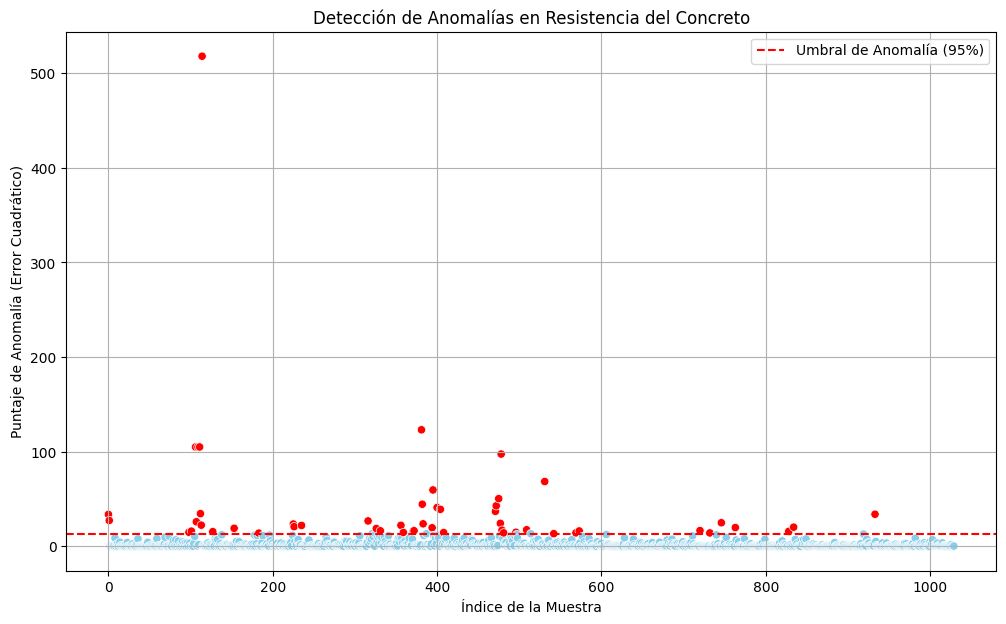

In [8]:
# 8. Visualización de anomalías
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x="index", y="reconstruction_error", hue="is_anomaly",
    palette={True: "red", False: "skyblue"}, data=reconstruction_error_df, legend=False
)
plt.axhline(y=reconstruction_error_threshold, color="r", linestyle="--", label="Umbral de Anomalía (95%)")
plt.title("Detección de Anomalías en Resistencia del Concreto")
plt.xlabel("Índice de la Muestra")
plt.ylabel("Puntaje de Anomalía (Error Cuadrático)")
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# 9. Muestras más anómalas
X_original = X.copy()
X_original["concrete_compressive_strength"] = y
X_original["anomaly_score"] = reconstruction_error

print("\n--- Las 10 Muestras más Anómalas ---")
print(X_original.sort_values(by="anomaly_score", ascending=False).head(10))


--- Las 10 Muestras más Anómalas ---
     cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
114   362.6               189.0      0.0  164.9              11.6   
381   315.0               137.0      0.0  145.0               5.9   
109   362.6               189.0      0.0  164.9              11.6   
111   362.6               189.0      0.0  164.9              11.6   
106   362.6               189.0      0.0  164.9              11.6   
478   446.0                24.0     79.0  162.0              11.6   
531   436.0                 0.0      0.0  218.0               0.0   
395   200.0               200.0      0.0  190.0               0.0   
475   446.0                24.0     79.0  162.0              11.6   
382   505.0                 0.0     60.0  195.0               0.0   

     coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  \
114             944.7            755.8    7                          22.90   
381            1130.0            745.0   28   

In [10]:
# 10. Evaluación del modelo y análisis de errores
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("\nEvaluación del Modelo RandomForest sobre concrete_compressive_strength")
print("------------------------------------------------")
print(f"MAE  (Error Absoluto Medio): {mae:,.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")


Evaluación del Modelo RandomForest sobre concrete_compressive_strength
------------------------------------------------
MAE  (Error Absoluto Medio): 1.22
R²   (Coeficiente de Determinación): 0.9866


# **CPP - KNN**

In [11]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
# Cargar el dataset
data = pd.read_csv("Concrete-Compressive-Strength-Prediction/dataset/concrete_data.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

Dimensiones del dataset: (1030, 9)
Columnas disponibles: Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
# 3. Preparar variables
# Eliminamos filas con nulos
data = data.dropna()

# Variable objetivo: resistencia del concreto
y = data["concrete_compressive_strength"]

# Features predictoras: quitamos la variable objetivo
X = data.drop("concrete_compressive_strength", axis=1)

# Filtramos solo columnas numéricas
X = X.select_dtypes(include=[np.number])

In [14]:
# 4. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# 5. Entrenar modelo KNN
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_scaled, y)

KNeighborsRegressor()

In [16]:
# 6. Predicciones
y_pred = model.predict(X_scaled)

In [17]:
# 7. Evaluación de anomalías
# Error absoluto de predicción
errors = np.abs(y - y_pred)

# Agregamos columna de errores al dataset
data["prediction"] = y_pred
data["error"] = errors

# Definimos umbral como percentil 95 del error
threshold = np.percentile(errors, 95)
data["anomaly"] = data["error"] > threshold

print(f"Umbral de error (95%): {threshold}")
print("Número de anomalías detectadas:", data["anomaly"].sum())

Umbral de error (95%): 13.500200000000003
Número de anomalías detectadas: 52


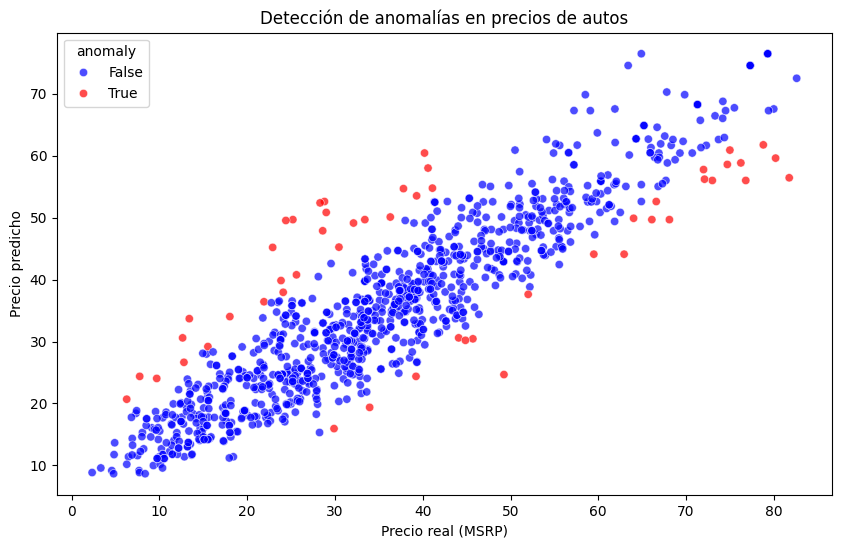

Ejemplos de autos detectados como anomalías:
    cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
69   485.0                 0.0      0.0  146.0               0.0   
71   313.3               262.2      0.0  175.5               8.6   
73   425.0               106.3      0.0  151.4              18.6   
74   375.0                93.8      0.0  126.6              23.4   
75   475.0               118.8      0.0  181.1               8.9   
76   469.0               117.2      0.0  137.8              32.2   
81   318.8               212.5      0.0  155.7              14.3   
82   401.8                94.7      0.0  147.4              11.4   
84   323.7               282.8      0.0  183.8              10.3   
85   379.5               151.2      0.0  153.9              15.9   

    coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  \
69            1120.0            800.0   28                          71.99   
71            1046.9            611.8    3          

In [18]:
# 8. Visualización
plt.figure(figsize=(10,6))
sns.scatterplot(x=y, y=y_pred, hue=data["anomaly"], palette={False:"blue", True:"red"}, alpha=0.7)
plt.xlabel("Precio real (MSRP)")
plt.ylabel("Precio predicho")
plt.title("Detección de anomalías en precios de autos")
plt.show()

# Mostrar ejemplos de anomalías
print("Ejemplos de autos detectados como anomalías:")
print(data[data["anomaly"]].head(10))

In [19]:
# 9. Evaluación de desempeño
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Evaluación del modelo KNN:")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")


Evaluación del modelo KNN:
MAE  : 5.20
R²   : 0.8354


# **CPP - Linear Regretion**

In [20]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [21]:
# Selección de variable objetivo y features
y = data["concrete_compressive_strength"]

# Eliminamos la variable objetivo
X = data.drop(columns=["concrete_compressive_strength"])

In [22]:
# Preprocesamiento
# Convertir variables categóricas a numéricas con LabelEncoder
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

In [23]:
# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_encoded, y)

# Predicciones
predictions = model.predict(X_encoded)

#Evaluación del modelo
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("Evaluación del Modelo:")
print(f"MAE (Mean Absolute Error): {mae:,.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Evaluación del Modelo:
MAE (Mean Absolute Error): 5.00
R² (Coeficiente de Determinación): 0.8451


In [24]:
# Error de reconstrucción
reconstruction_error = (y - predictions) ** 2

error_df = pd.DataFrame({
    "index": X_encoded.index,
    "reconstruction_error": reconstruction_error,
    "MSRP": y
})

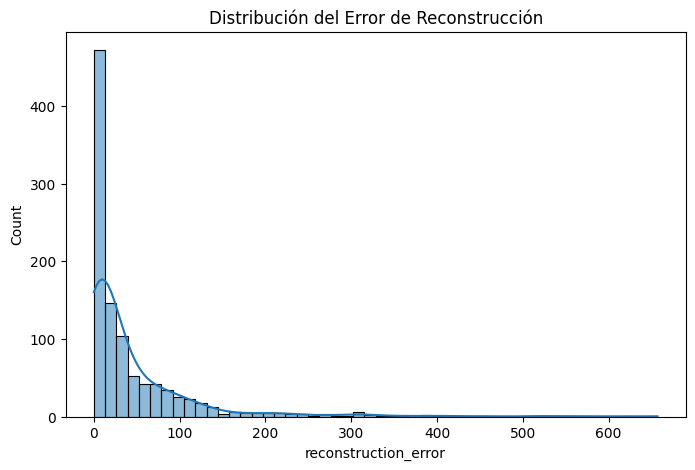

In [25]:
# Visualización de distribución del error
plt.figure(figsize=(8,5))
sns.histplot(error_df["reconstruction_error"], bins=50, kde=True)
plt.title("Distribución del Error de Reconstrucción")
plt.show()

Posibles anomalías (top 10):


,index,reconstruction_error,MSRP
395,395,656.935801,49.25
87,87,618.699898,24.40
381,381,574.205337,81.75
81,81,546.604756,25.20
71,71,519.328060,28.80
84,84,510.680486,28.30
153,153,449.890600,80.20
114,114,424.281108,22.90
178,178,395.264355,76.80
74,74,391.406644,29.00


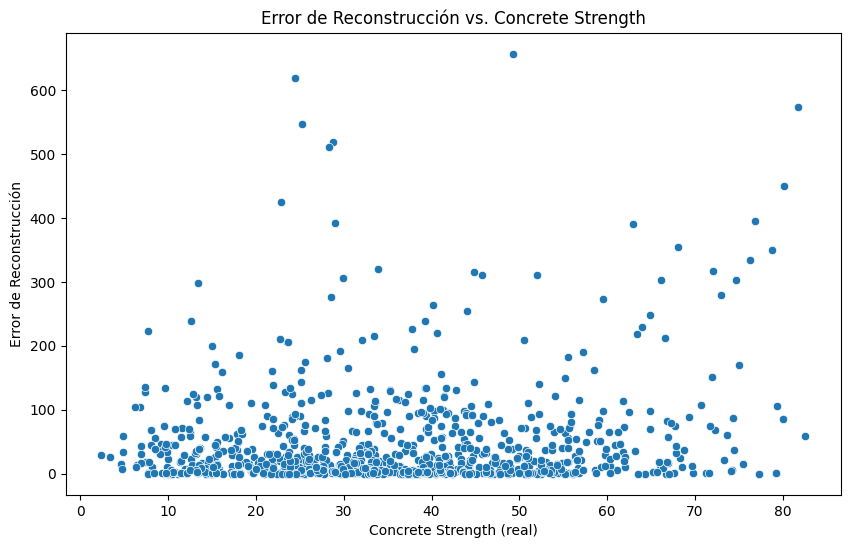

In [26]:
# Identificar posibles anomalías (Top N)
top_anomalias = error_df.sort_values(by="reconstruction_error", ascending=False).head(10)
print("Posibles anomalías (top 10):")
display(top_anomalias)

# Gráfico: MSRP real vs. error
plt.figure(figsize=(10,6))
sns.scatterplot(data=error_df, x="MSRP", y="reconstruction_error")
plt.title("Error de Reconstrucción vs. Concrete Strength")
plt.xlabel("Concrete Strength (real)")
plt.ylabel("Error de Reconstrucción")
plt.show()

# **CPP - MLPR**

In [27]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [28]:
# 3. Definir variable objetivo y features
y = data['concrete_compressive_strength']   # variable target
X = data.drop('concrete_compressive_strength', axis=1)

# Tomamos solo columnas numéricas (el dataset ya debería ser numérico, pero por seguridad)
X = X.select_dtypes(include=[np.number])

In [29]:
# 4. Escalado de features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 5. Definir y entrenar modelo
model = MLPRegressor(hidden_layer_sizes=(100,50),
                     max_iter=1000,
                     random_state=42)

model.fit(X_scaled, y)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [31]:
# 6. Predicciones y error de reconstrucción
predictions = model.predict(X_scaled)
reconstruction_error = (y - predictions) ** 2

In [32]:
# 7. Evaluación del modelo
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print("Evaluación del modelo:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")

Evaluación del modelo:
MAE  (Error Absoluto Medio): 1.52
R²   (Coeficiente de Determinación): 0.9826


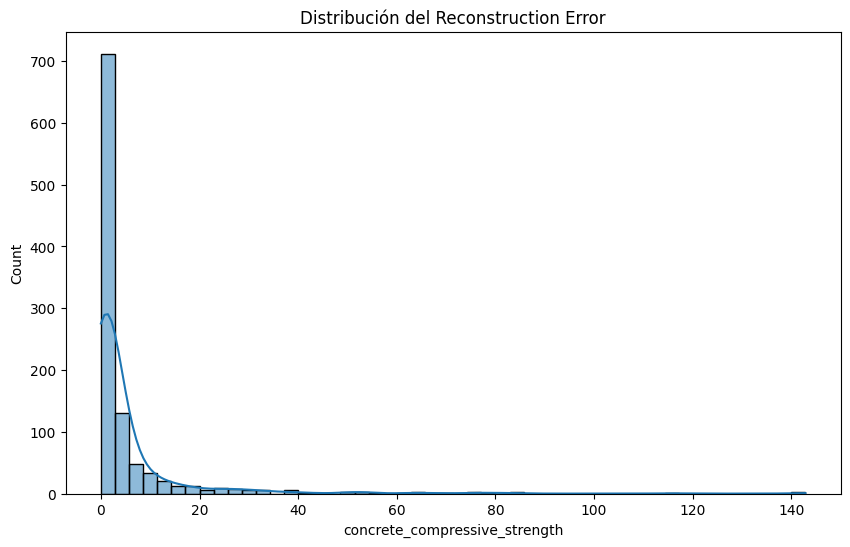

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction,error,anomaly,Prediction,ReconstructionError
162,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64.90,76.420,11.520,False,76.851723,142.843677
139,374.0,189.2,0.0,170.1,10.1,926.1,756.7,56,63.40,74.520,11.120,False,75.329013,142.301347
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100,33.56,41.714,8.154,False,44.298886,115.323680
919,313.0,0.0,0.0,178.0,8.0,1000.0,822.0,28,25.10,35.796,10.696,False,34.258761,83.882911
982,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10,35.796,10.696,False,34.204258,82.887516
478,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7,52.01,37.608,14.402,True,43.185968,77.863532
885,153.0,145.0,113.0,178.0,8.0,867.0,824.0,28,26.23,36.216,9.986,False,35.007807,77.049898
948,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28,26.23,36.216,9.986,False,34.995401,76.832248
401,475.0,0.0,0.0,162.0,9.5,1044.0,662.0,28,58.52,69.808,11.288,False,66.922133,70.595835
914,313.0,145.0,0.0,178.0,8.0,1002.0,689.0,28,41.05,48.106,7.056,False,49.137368,65.405529


In [33]:
# 8. Análisis de anomalías
data['Prediction'] = predictions
data['ReconstructionError'] = reconstruction_error

plt.figure(figsize=(10,6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.title("Distribución del Reconstruction Error")
plt.show()

# Top 10 anomalías
anomalies = data.sort_values(by="ReconstructionError", ascending=False).head(10)
anomalies